<a href="https://colab.research.google.com/github/lexilei/code_sample/blob/main/Temperature_plot_and_analysis_of_clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code sample demonstatreas the behavior of systems with stochasticity that exhibit phase transitions.

In stochastic systems, the outcome of every simulation is different (due to the presence of random fluctuations). However, we expect that the system will reach equilibrium and therefore become *ergodic*, i.e., all accessible configurations are equiprobable over a long period of time. It follows from this that we can either run a single simulation for a very long time, or equivalently, we can average the behavior of multiple simulations with the same parameters. The latter is often less time consuming, so it can be beneficial to run multiple instantiations and average the results together.

There are several hallmarks of a phase transition, like that seen in the Ising model. Depending on the nature of the phase transition (e.g., first order, second order), there are physical quantities in the system that can become undefined at the transition. One such quantity for the *Ising model* and for *percolation* (which you'll explore in the second question) is related to the sizes and variation of sizes of the clusters of spins.



1. *Ising model:*

(a) A function that takes in a binary image and computes and returns the following quantities about connected components within the image: **area of each cluste**r, **number of clusters**, **average cluster area**, **the variance of the cluster areas**, **and the maximum cluster area **(don't forget about periodic boundary conditions for these measurements). Your function should also return the labeled image so that you can display it. Note: characterize cluster areas from of the dominant pixel value in the image (e.g., if there are more light pixels, characterize light clusters).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as image
import skimage.measure as ski
import numpy.random as nprnd

In [ ]:
def imageInfo(binary,label):
  im = image.image.imread(binary)
  bi = im[:,:,0]
  primarycolor=np.mean(bi)
  if primarycolor<0.5:
    bi=1-bi
  # create a matrix that labels individual regions
  label_image = ski.label(bi)
  #Measure properties of labeled image regions
  props= ski.regionprops(label_image)
  #number of regions
  num=len(props)
  area=np.zeros(num)
  xc=np.zeros(np.shape(props))
  yc=np.zeros(num)
  for i in range(num):
    area[i]=props[i].area
    xc[i]=props[i].centroid[1]
    yc[i]=props[i].centroid[0]

  #create label image
  Img=label_image

  fig,ax=plt.subplots(1,1)
  ri=ax.imshow(Img)
  #ax.plot(xc,yc,'.w')
  ax.set(title=label)
  plt.colorbar(ri)
  plt.show()
  return area,num,np.mean(area),np.var(area),np.max(area)

(b) Temperature analysis of results [here](https://www.dropbox.com/sh/4kuhkypxemc5o0e/AAAt2KXfeTVtHdfAWU9bLUG5a?dl=0) from a larger simulation.

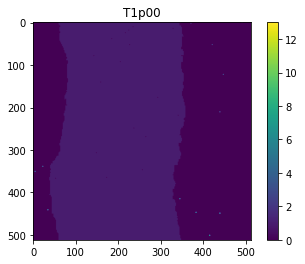

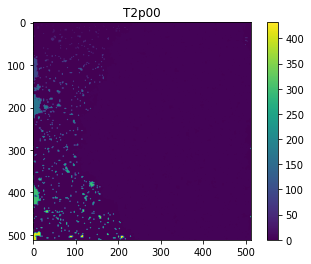

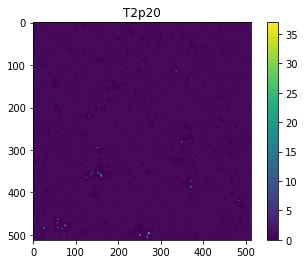

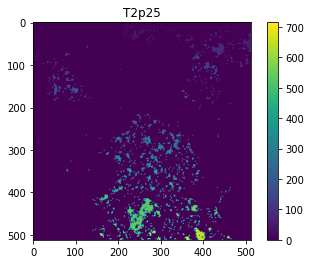

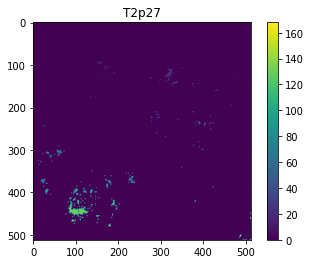

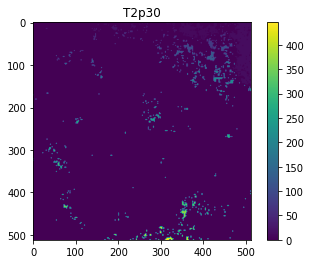

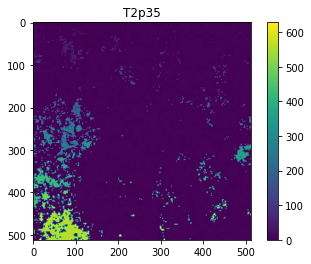

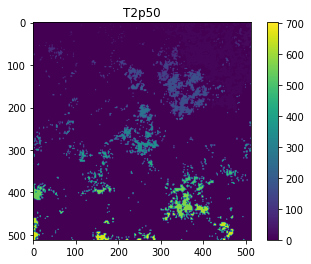

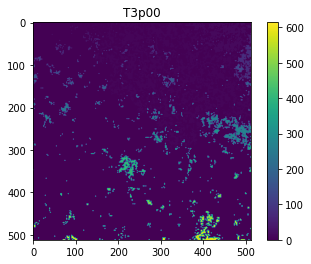

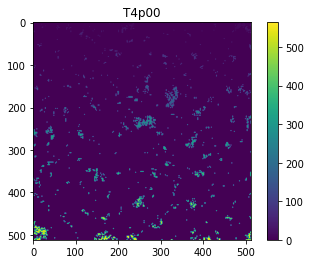

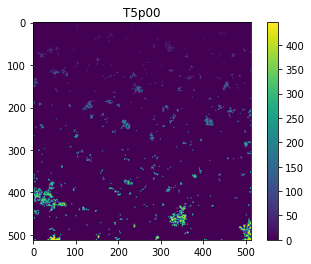

In [ ]:
T1p00=imageInfo('ising-field-T1p00.png',"T1p00")
#I converted the image into an array and kept only the first channel all
#inside my function
T2p00=imageInfo('ising-field-T2p00.png',"T2p00")
T2p20=imageInfo('ising-field-T2p20.png',"T2p20")
T2p25=imageInfo('ising-field-T2p25.png',"T2p25")
T2p27=imageInfo('ising-field-T2p27.png',"T2p27")
T2p30=imageInfo('ising-field-T2p30.png',"T2p30")
T2p35=imageInfo('ising-field-T2p35.png',"T2p35")
T2p50=imageInfo('ising-field-T2p50.png',"T2p50")
T3p00=imageInfo('ising-field-T3p00.png',"T3p00")
T4p00=imageInfo('ising-field-T4p00.png',"T4p00")
T5p00=imageInfo('ising-field-T5p00.png',"T5p00")

(c) Temperature plot for other quantities as a function of temperature: number of clusters, average area, variance of areas, and maximum area. Areas are normalized by overall system area, so that the values are between zero and one.

In [ ]:
T=np.array([1.00,2.00,2.20,2.25,2.27,2.30,2.35,2.50,3.00,4.00,5.00])

In [ ]:
data=[T1p00,T2p00,T2p20,T2p25,T2p27,T2p30,T2p35,T2p50,T3p00,T4p00,T5p00]

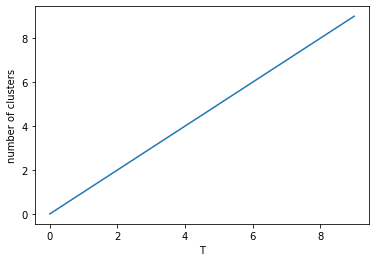

In [ ]:
num=[]
for i in range(10):
  num+=[i]
fig,ax = plt.subplots(1,1)
ax.plot(range(10),num,'-')
ax.set(xlabel='T',ylabel='number of clusters')
plt.show()
# When T is smaller than 2.5, num increases as T increases. When T is bigger than 2.5
# num decreases as T increases. Around 2.5, huge oscillations happen on the graph.

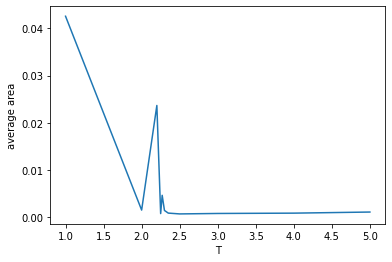

In [ ]:
averagearea=[]
for d in data:
  averagearea+=[d[2]/512/512]
fig,ax = plt.subplots(1,1)
ax.plot(T,averagearea,'-')
ax.set(xlabel='T',ylabel='average area')
plt.show()
# Average area exponentially decrease as T increases, but jumps at around 2.25.

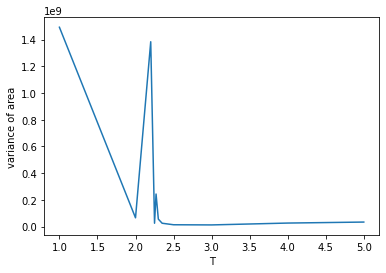

In [ ]:
variance=[]
for d in data:
  variance+=[d[3]]
fig,ax = plt.subplots(1,1)
ax.plot(T,variance,'-')
ax.set(xlabel='T',ylabel='variance of area')
plt.show()
# same as above

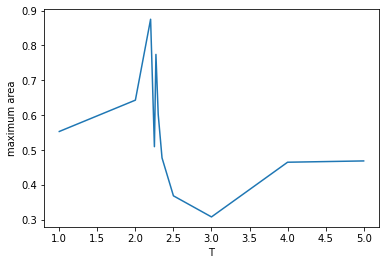

In [ ]:
maxarea=[]
for d in data:
  maxarea+=[d[4]/512/512]
fig,ax = plt.subplots(1,1)
ax.plot(T,maxarea,'-')
ax.set(xlabel='T',ylabel='maximum area')
plt.show()
# The graph goes up until it reaches the peak at around 2.25, and then reaches
# the bottom at 3, then goes back up again. Based on the information we
# have, it might be oscillatory, but I need more info to tell.

In [ ]:
# It aligns with my expectations because for part 1 the change is the biggest
# at around 2.5 which is exactly the pattern we are seeing here.

2. *Node percolation*: In this system, each node is assumed to be "open" with probability p and "closed" with probability 1-p, and liquid can flow through open parts of the system. This model was inspired by geophysical flows (e.g., oil) through porous substrates.

(a) Given the description above, what is required for the liquid to flow from one side of the system to the other? How might we measure / quantify this?  

In [ ]:
# It is required that there is at least on connected route that connects
# one side to another side. If we are considering a square lattice, the liquid
# must pass through all of the columes at least once. And it must be connected
# to the passing point in the last colume.
# We might measure this by measuring how much of total fluid has flew through
# or we can quantify by measuring how much of total area has been covered.

(b) Write a function that creates an NxN matrix of random numbers between zero and 1, and binarizes this matrix by setting values smaller than a specified input threshold equal to 1 (these are open nodes) and everything else equal to zero (these are closed nodes). Your function should have inputs of N and threshold, and should output an NxN binary matrix. Note: this is simpler than the problem in class -- you are not being asked to compute/estimate a "best" threshold for the conversion to a binary image; instead, here, you'll vary this threshold value to explore how the system behaves.

In [ ]:
def createMatrix(N,thresh):
  mat=np.zeros([N,N])
  for a in range(N):
    for b in range(N):
      i=nprnd.rand(1)
      if i<thresh:
        i=1
      else:
        i=0
      mat[a,b]=i

  return mat

(c) Write a function that characterizes the open clusters in the binary image created by your function in part(b). Your function should return the label image,  number of clusters, the maximum cluster area, and the measures you proposed in part (a). Test your function on a small system (say N=100) for p=0.1 and p=0.9. Plot label images and discuss what you see. Discuss the results in the context of the qualitative picture for the model: what do these plots suggest about the flow of liquid through the system and why?

In [ ]:
def opencluster(N,p,label):
  bi=createMatrix(N,p)
  # create a matrix that labels individual regions
  label_image = ski.label(bi)
  #Measure properties of labeled image regions
  props= ski.regionprops(label_image)
  #number of regions
  num=len(props)
  area=np.zeros(num)
  xc=np.zeros(np.shape(props))
  yc=np.zeros(num)
  for i in range(num):
    area[i]=props[i].area
    xc[i]=props[i].centroid[1]
    yc[i]=props[i].centroid[0]

  #create label image
  Img=label_image

  fig,ax=plt.subplots(1,1)
  ri=ax.imshow(Img)
  #ax.plot(xc,yc,'.w')
  ax.set(title=label)
  plt.colorbar(ri)
  plt.show()
  return area,num,np.mean(area),np.var(area),np.max(area),sum(area)/512/512

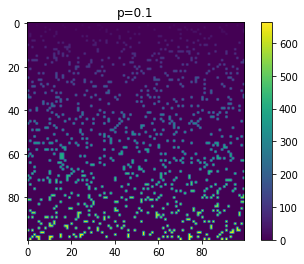

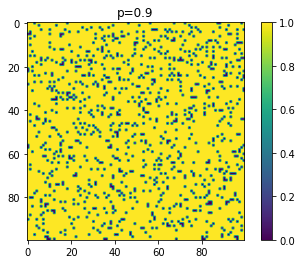

In [ ]:
p1= opencluster(100,0.1,"p=0.1")
p9 = opencluster(100,0.9,"p=0.9")

In [ ]:
# what do these plots suggest about the flow of liquid through the system and why?
# The randomness of the plots suggests that whether a location has been flooded only
# depends itself but not very much related to it's surroundings. Normally we would
# think if one part is wet, its adjacent area would be more likely to get wet, but
# it does not seem to be the case.
# Also, the plots are opposite to each other

(d) To explore behavior of the model at intermediate values, create a finely and uniformly spaced array of probabilities, p (between 0 and 1, with 100 data points), and run your program above for each value of p and a system size of N = 1000. Plot the function outputs that describe cluster properties in the system as a function of p. Do large and small values behave the way you expect? Describe the behavior for intermediate p values and explain qualitatively what you think is happening.

In [ ]:
def opencluster2(N,p,label):
  #cThis doesn't print the graph with the function so that we don't
  # end up with 100 graphs

  bi=createMatrix(N,p)
  label_image = ski.label(bi)
  props= ski.regionprops(label_image)

  num=len(props)
  area=np.zeros(num)

  for i in range(num):
    area[i]=props[i].area

  return area,num,np.mean(area),np.var(area),np.max(area),sum(area)/512/512

In [ ]:
p=np.linspace(0.01,1,100)

In [ ]:
num2=np.zeros([100])
avgArea2=np.zeros([100])
var2=np.zeros([100])
maxArea=np.zeros([100])
totalpercent=np.zeros([100])

In [ ]:
for i in range(100):
  a=opencluster2(1000,p[i],"N=1000, p between 0 and 1")
  num2[i]=a[1]
  avgArea2[i]=a[2]
  var2[i]=a[3]
  maxArea[i]=a[4]
  totalpercent[i]=a[5]

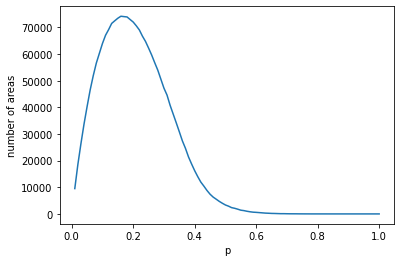

In [ ]:
fig,ax = plt.subplots(1,1)
ax.plot(p,num2,'-')
ax.set(xlabel='p',ylabel='number of areas')
plt.show()
# large and small values behave as I expected because at first dots of fluid starts to be able to
# pass through this thin "paper", and then as more fluid passed through, they merged together
# into fewer and fewer areas, until there is only one area because fluid was flowing through
# everywhere.

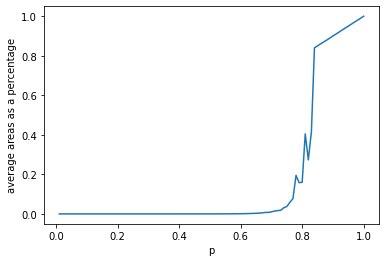

In [ ]:
fig,ax = plt.subplots(1,1)
ax.plot(p,avgArea2/1000/1000,'-')
ax.set(xlabel='p',ylabel='average areas as a percentage')
plt.show()
# Average area does not behave as I expected, I expected it to look more like
# the max area graph where the peak should be around 0.4. Because there are so
# areas at p=0.5, I would assume the average area should be a lot bigger.

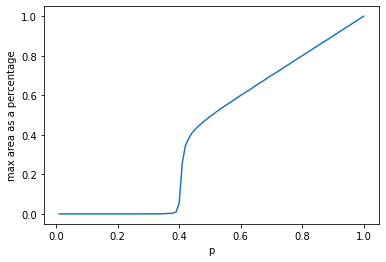

In [ ]:
fig,ax = plt.subplots(1,1)
ax.plot(p,maxArea/1000/1000,'-')
ax.set(xlabel='p',ylabel='max area as a percentage')
plt.show()

# This behaves exactly as I expected. The max area graph lookes like the inverse
# of the number of areas graph.

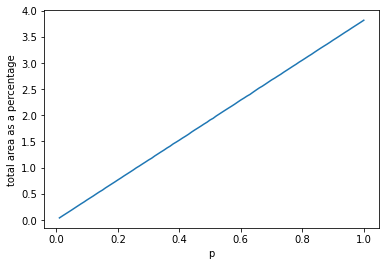

In [ ]:
fig,ax = plt.subplots(1,1)
ax.plot(p,totalpercent,'-')
ax.set(xlabel='p',ylabel='total area as a percentage')
plt.show()

#This also looks exactly as I expected. The total area as a percentage keeps increasing
#linearly as p increases.

(e) Repeat the calculations for part (d), and vary the system size, N. Use values of N = [10, 20, 50, 100, 200, 500, 1000]. Plot the maximum cluster area (normalized by system area) as a function of p for all N values on the same axes. Be sure to include axis labels and plot labels for each curve. Describe the behavior of the system as a function of system size, and explain why this happens.

In [ ]:
# The general trend of change is the same for all system size. At very small
# N, the fluctuations between data points are very big. But at big N the curve is
# much smoother and gives us a much better idea of pattern. This is happening because
# the smaller N is, the more random the system is. Like tosing a fair coin: if we tose
# it for just 2 times, we might get all heads, which is very non-reflective of the
# actual possibility of getting heads (50%). But if we tose it for 1000000 times, we
# might get, for example, 49950 heads, which is much closer to 50%.

In [ ]:
N = np.array([10, 20, 50, 100, 200, 500, 1000])

In [ ]:
num3=np.zeros([7,100])
avgArea3=np.zeros([7,100])
var3=np.zeros([7,100])
maxArea3=np.zeros([7,100])
totalpercent3=np.zeros([7,100])

In [ ]:

for i in range(7):
  for j in range(100):
    b=opencluster2(N[i],p[j],"N=1000, p between 0 and 1")
    num3[i][j]=b[1]
    avgArea3[i][j]=b[2]
    var3[i][j]=b[3]
    maxArea3[i][j]=b[4]
    totalpercent3[i][j]=b[5]

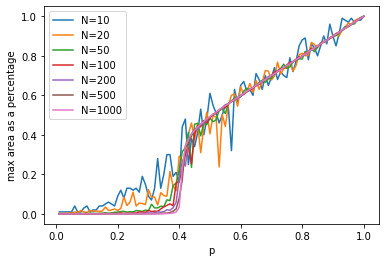

In [ ]:
fig,ax = plt.subplots(1,1)
for i in range(7):
  l="N="+str(N[i])
  ax.plot(p,maxArea3[i].T/N[i]/N[i],label=l)
ax.set(xlabel='p',ylabel='max area as a percentage')
plt.legend()
plt.show()


In [ ]:
%%shell

jupyter nbconvert --to html /content/Lex_Module_6,_Part_II.ipynb

[NbConvertApp] Converting notebook /content/Lex_Module_6,_Part_II.ipynb to html
[NbConvertApp] Writing 1073499 bytes to /content/Lex_Module_6,_Part_II.html
